In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
# -*- coding: utf-8 -*-
"""
A vanishing/exploding gradients demo, mostly written by ChatGPT.
Dead neurons are also demonstrated.

"""

# Activation functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
  return np.where(x > 0, x, alpha * x)

# Derivatives for backpropagation
def sigmoid_derivative(x):
  return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
  return np.where(x > 0, 1, 0)

def leaky_relu_derivative(x, alpha=0.01):
  return np.where(x > 0, 1, alpha)

# Forward propagation
def forward_propagation(x, weights, biases, activation_func):
  activations = [x]  # x is now a vector of 5 inputs
  for w, b in zip(weights, biases):
    x = activation_func(np.dot(w, x) + b)  # Use matrix multiplication for multiple neurons
    activations.append(x)
  return activations

# Backward propagation 
def backward_propagation(activations, weights, activation_deriv):
  gradients = []
  delta = activation_deriv(activations[-1])  # Initial gradient (error assumed as 1 for each neuron)
  for i in reversed(range(len(weights))):
    gradients.append(delta)
    delta = np.dot(weights[i].T, delta) * activation_deriv(activations[i])  # Matrix multiplication for gradients
  return gradients[::-1]

# Initialize weights and biases
def initialize_weights_and_biases(n_layers, n_neurons=5, initialization='he'):
  if initialization == 'he':
    weights = [np.random.randn(n_neurons, n_neurons) * np.sqrt(2 / n_neurons) for _ in range(n_layers)]
    biases = [np.random.randn(n_neurons) * 1.0 for _ in range(n_layers)]  # Larger biases
  else:
    weights = [np.random.randn(n_neurons, n_neurons) for _ in range(n_layers)]
    biases = [np.random.randn(n_neurons) * 1.0 for _ in range(n_layers)]
  return weights, biases

# Experiment setup
def experiment(n_layers, activation_func, activation_deriv, weight_init='he', n_neurons=5):
  gradients_list = []
  for layers in range(1, n_layers+1):
    x_input = np.ones(n_neurons) * 10.0  # Initialize input with large positive values for each neuron
    weights, biases = initialize_weights_and_biases(layers, n_neurons, initialization=weight_init)
    activations = forward_propagation(x_input, weights, biases, activation_func)
    gradients = backward_propagation(activations, weights, activation_deriv)
    avg_gradient = np.mean(gradients[0])  # Average gradient of the first layer
    gradients_list.append(avg_gradient)
  return gradients_list

def plot_gradients(n_layers, sigmoid_gradients, relu_gradients, title):
  plt.figure(figsize=(10, 6))
  
  # Take the absolute values of the gradients to handle negative values on log scale
  abs_sigmoid_gradients = np.abs(sigmoid_gradients)
  abs_relu_gradients = np.abs(relu_gradients)
  
  # Replace zero values with a very small value to show them in log scale
  sigmoid_gradients_nonzero = [grad if grad != 0 else 1e-20 for grad in abs_sigmoid_gradients]
  relu_gradients_nonzero = [grad if grad != 0 else 1e-20 for grad in abs_relu_gradients]
  
  # Plot all sigmoid gradients with small markers
  plt.scatter(range(1, n_layers+1), sigmoid_gradients_nonzero, label='Sigmoid Gradients (Abs)', marker='o', s=20)
  
  # Plot all ReLU gradients
  plt.scatter(range(1, n_layers+1), relu_gradients_nonzero, label='ReLU Gradients (Abs)', marker='x', s=20)
  
  plt.yscale('log')
  
  plt.title(f'{title}: Average Gradient of the First Layer (Single Training Step)')
  plt.xlabel('Number of Layers')
  plt.ylabel('Average Gradient Magnitude (Log Scale)')
  
  plt.legend()
  plt.grid(True)
  
  # Set y-limits to visualize small values (log scale)
  # plt.ylim(1e-21, 1e5)
  plt.show()


In [3]:

# Experiments
n_layers = 30  # Number of layers to simulate
n_neurons = 10


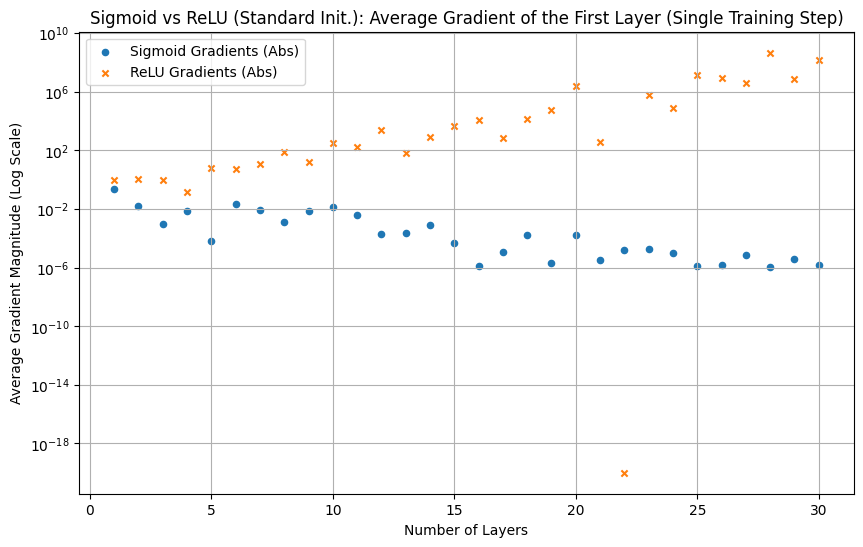

In [4]:

# Experiment 1: Sigmoid vs ReLU, standard initialization
# This illustrates a problem with ReLU when initial values can be negative
sigmoid_gradients_standard = experiment(n_layers, sigmoid, sigmoid_derivative, weight_init='standard', n_neurons=n_neurons)
relu_gradients_standard    = experiment(n_layers, relu, relu_derivative, weight_init='standard', n_neurons=n_neurons)
plot_gradients(n_layers, sigmoid_gradients_standard, relu_gradients_standard, 'Sigmoid vs ReLU (Standard Init.)')


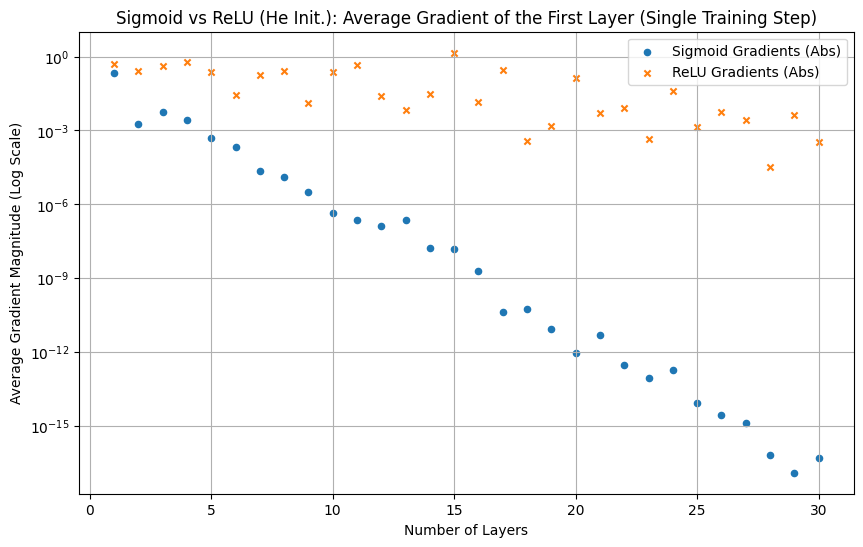

In [5]:

# Experiment 2: Sigmoid vs ReLU, He initialization
# This illustrates a problem with ReLU when initial values can be negative
sigmoid_gradients_he = experiment(n_layers, sigmoid, sigmoid_derivative, weight_init='he', n_neurons=n_neurons)
relu_gradients_he    = experiment(n_layers, relu, relu_derivative, weight_init='he', n_neurons=n_neurons)
plot_gradients(n_layers, sigmoid_gradients_he, relu_gradients_he, 'Sigmoid vs ReLU (He Init.)')


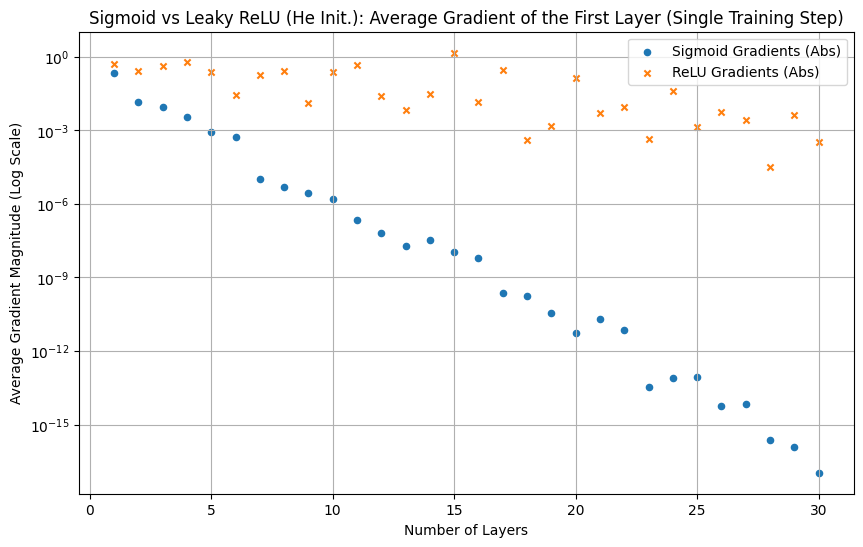

In [6]:

# Experiment 3: Sigmoid vs Leaky ReLU, He initialization
# This illustrates a problem with ReLU when initial values can be negative
sigmoid_gradients_he    = experiment(n_layers, sigmoid, sigmoid_derivative, weight_init='he', n_neurons=n_neurons)
leaky_relu_gradients_he = experiment(n_layers, leaky_relu, leaky_relu_derivative, weight_init='he', n_neurons=n_neurons)
plot_gradients(n_layers, sigmoid_gradients_he, relu_gradients_he, 'Sigmoid vs Leaky ReLU (He Init.)')


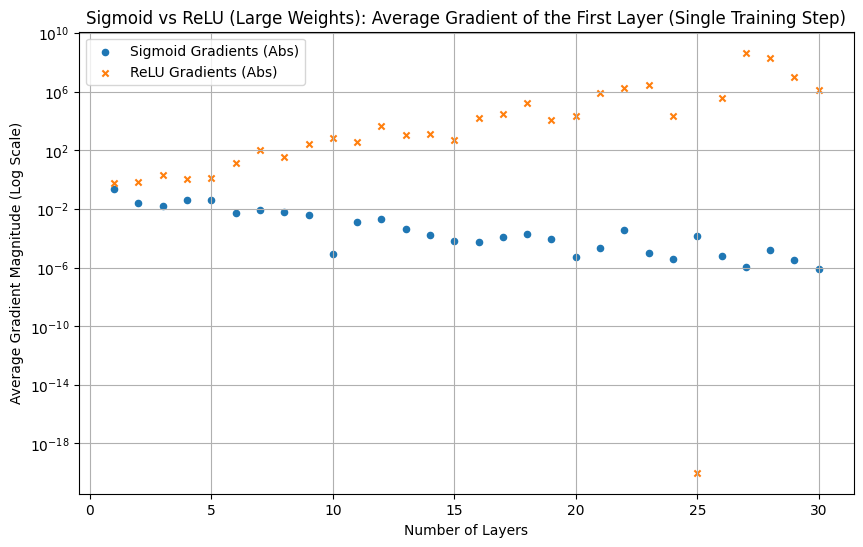

In [7]:

# Experiment 4: Experiment with large weights
sigmoid_gradients_large = experiment(n_layers, sigmoid, sigmoid_derivative, weight_init='large', n_neurons=n_neurons)
relu_gradients_large = experiment(n_layers, relu, relu_derivative, weight_init='large', n_neurons=n_neurons)
plot_gradients(n_layers, sigmoid_gradients_large, relu_gradients_large, 'Sigmoid vs ReLU (Large Weights)')
